[  0  67  18  97 100  77  99  76  32  52  42  48  71  92  80  45   1  72
  43   6  26  55  37  33  74  36  70  79   8  58  25  96  28  34  40  59
  41  82  54  86  46  24  63  81  51  83   7  50  30  35  90  94  91  61
  65  56  47  44  16  88   3  62  19  17   5  15  68  95  85  60  23   9
  93  84  49   2  53  66  98  31  12  38  73  57  39  10  20  21  69  87
  29  13  27   4  75  14  11  78  64  89  22 101] 
 224032.10997532165
[  0  76  38  66  68  31  78   3 100  77  92  96  88  16  94  46  70  19
  17  52  80  15  11   7  41  22  42  79  21  67  93  81  20  27  85  82
  23  48  39   6  90  89  57   8  50  25  47  43  97  59  10  30  56  40
  69  75  72  55  84  18  12   4  36  51  37  71  99  60  58   9  87  45
  26  95  13  35  29  53  62  98  91  28  44  64   1  14  73  54  65  32
  33   2  49  83  86  24  63  74   5  34  61 101] 
 44670.11471558576


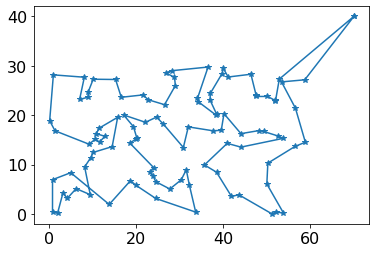

In [1]:
from numpy import loadtxt,radians,sin,cos,inf,exp
from numpy import array,r_,c_,arange,savetxt
from numpy.lib.scimath import arccos
from numpy.random import shuffle,randint,rand
from matplotlib.pyplot import plot, show, rc




a=loadtxt("./数据集/Pdata17_1.txt")
x=a[:,::2]. flatten(); y=a[:,1::2]. flatten()
d1=array([[70,40]]); xy=c_[x,y]
xy=r_[d1,xy,d1]; N=xy.shape[0]
t=radians(xy)  #转化为弧度
d=array([[6370*arccos(cos(t[i,0]-t[j,0])*cos(t[i,1])*cos(t[j,1])+\
    sin(t[i,1])*sin(t[j,1])) for i in range(N)]\
        for j in range(N)]).real
savetxt('./数据集/Pdata17_2.txt',c_[xy,d])  #把数据保存到文本文件，供下面使用
path=arange(N); L=inf
for j in range(1000):
    path0=arange(1,N-1); shuffle(path0)
    path0=r_[0,path0,N-1]; L0=d[0,path0[1]]  #初始化
    for i in range(1,N-1):L0+=d[path0[i],path0[i+1]]
    if L0<L: path=path0; L=L0
print(path,'\n',L)
e=0.1**30; M=20000; at=0.999; T=1
for k in range(M):
    c=randint(1,101,2); c.sort()
    c1=c[0]; c2=c[1]
    df=d[path[c1-1],path[c2]]+d[path[c1],path[c2+1]]-\
    d[path[c1-1],path[c1]]-d[path[c2],path[c2+1]]  #续行
    if df<0:
        path=r_[path[0],path[1:c1],path[c2:c1-1:-1],path[c2+1:102]]; L=L+df
    else:
        if exp(-df/T)>=rand(1):
            path=r_[path[0],path[1:c1],path[c2:c1-1:-1],path[c2+1:102]]
            L=L+df
    T=T*at
    if T<e: break
print(path,'\n',L)  #输出巡航路径及路径长度
xx=xy[path,0]; yy=xy[path,1]; rc('font',size=16)
plot(xx,yy,'-*'); show()  #画巡航路径

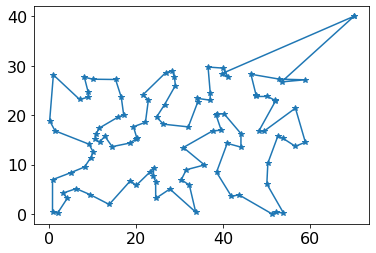

所求的巡航路径长度为： 42795.55518471192


In [2]:
import numpy as np
from numpy.random import randint, rand, shuffle
from matplotlib.pyplot import plot, show, rc




a=np.loadtxt("./数据集/Pdata17_2.txt")
xy,d=a[:,:2],a[:,2:]; N=len(xy)
w=50; g=10  #w为种群的个数，g为进化的代数
J=[];
for i in np.arange(w):
    c=np.arange(1,N-1); shuffle(c)
    c1=np.r_[0,c,101]; flag=1
    while flag>0:
        flag=0
        for m in np.arange(1,N-3):
            for n in np.arange(m+1,N-2):
                if d[c1[m],c1[n]]+d[c1[m+1],c1[n+1]]<\
                    d[c1[m],c1[m+1]]+d[c1[n],c1[n+1]]:
                    c1[m+1:n+1]=c1[n:m:-1]; flag=1
    c1[c1]=np.arange(N); J.append(c1)
J=np.array(J)/(N-1)
for k in np.arange(g):
    A=J.copy()
    c1=np.arange(w); shuffle(c1) #交叉操作的染色体配对组
    c2=randint(2,100,w)  #交叉点的数据
    for i in np.arange(0,w,2):
        temp=A[c1[i],c2[i]:N-1]  #保存中间变量
        A[c1[i],c2[i]:N-1]=A[c1[i+1],c2[i]:N-1]
        A[c1[i+1],c2[i]:N-1]=temp
    B=A.copy()
    by=[]  #初始化变异染色体的序号
    while len(by)<1: by=np.where(rand(w)<0.1)
    by=by[0]; B=B[by,:]
    G=np.r_[J,A,B]
    ind=np.argsort(G,axis=1)  #把染色体翻译成0,1，…，101
    NN=G.shape[0]; L=np.zeros(NN)
    for j in np.arange(NN):
        for i in np.arange(101):
            L[j]=L[j]+d[ind[j,i],ind[j,i+1]]
    ind2=np.argsort(L)
    J=G[ind2,:]
path=ind[ind2[0],:]; zL=L[ind2[0]]
xx=xy[path,0]; yy=xy[path,1]; rc('font',size=16)
plot(xx,yy,'-*'); show()  #画巡航路径
print("所求的巡航路径长度为：",zL)

In [3]:
from sklearn.linear_model import Perceptron
import numpy as np



x0=np.array([[-0.5,-0.5,0.3,0.0],[-0.5,0.5,-0.5,1.0]]).T
y0=np.array([1,1,0,0])
md = Perceptron(tol=1e-3)   #构造模型
md.fit(x0, y0)              #拟合模型
print(md.coef_,md.intercept_)  #输出系数和常数项
print(md.score(x0,y0))   #模型检验
print("预测值为：",md.predict(np.array([[-0.5,0.2]])))


[[-1.3 -0.5]] [0.]
1.0
预测值为： [1]


In [4]:
from sklearn.neural_network import MLPClassifier
from numpy import array, r_, ones,zeros




x0=array([[1.14,1.18,1.20,1.26,1.28,1.30,1.24,1.36,1.38,1.38,1.38,1.40,1.48,1.54,1.56],\
    [1.78,1.96,1.86,2.00,2.00,1.96,1.72,1.74,1.64,1.82,1.90,1.70,1.82,1.82,2.08]]).T
y0=r_[ones(6),zeros(9)]
md = MLPClassifier(solver='lbfgs', alpha=1e-5,\
    hidden_layer_sizes=15)
md.fit(x0, y0); x=array([[1.24, 1.80], [1.28, 1.84], [1.40, 2.04]])
pred=md.predict(x); print(md.score(x0,y0)); print(md.coefs_)
print("属于各类的概率为：",md.predict_proba(x))
print("三个待判样本点的类别为：",pred);

1.0
[array([[ 0.28126168,  0.12518994,  0.07181552, -0.12549594, -0.32029835,
        -0.1615063 , -0.40942728,  0.28221268, -0.10224937,  0.29650392,
        -0.16436554,  0.45226889,  2.92851953, 11.72394271,  0.16767737],
       [ 0.54665039, -0.10842092, -0.56597798, -0.41298775,  0.33596415,
         3.93954622, -0.57229678,  0.4686346 , -0.04849193, -0.18552304,
         0.73418187, -0.37259646, -4.34334666, -5.64068543, -0.25234265]]), array([[  0.31577391],
       [  0.40896458],
       [  0.30599691],
       [  0.19652913],
       [  0.28264317],
       [  8.58350274],
       [  0.30298494],
       [  0.60770399],
       [  0.58453424],
       [  0.34520825],
       [  0.18992908],
       [  0.11790043],
       [ 11.46876866],
       [-13.8522858 ],
       [  0.06061086]])]
属于各类的概率为： [[0.36389995 0.63610005]
 [0.81481978 0.18518022]
 [0.19807446 0.80192554]]
三个待判样本点的类别为： [1. 0. 1.]


0.9849563529698562
客运量的预测值为： [54449.61896382 56573.68627754] 
----------------
0.9602455651426982
货运量的预测值为： [28910.33601033 30159.56392678]


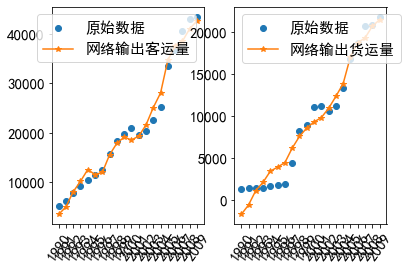

In [6]:
from sklearn.neural_network import MLPRegressor
from numpy import array, loadtxt
from pylab import subplot, plot, show, xticks,rc,legend




rc('font',size=15); rc('font',family='SimHei')
a=loadtxt("./数据集/Pdata17_5.txt"); x0=a[:,:3]; y1=a[:,3]; y2=a[:,4];
md1=MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=10,max_iter=3000)
md1.fit(x0, y1); x=array([[73.39,3.9635,0.988],[75.55,4.0975,1.0268]])
pred1=md1.predict(x); print(md1.score(x0,y1));
print("客运量的预测值为：",pred1,'\n----------------');
md2=MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=10,max_iter=3000)
md2.fit(x0, y2); pred2=md2.predict(x); print(md2.score(x0,y2));
print("货运量的预测值为：",pred2); yr=range(1990,2010)
subplot(121); plot(yr,y1,'o'); plot(yr,md1.predict(x0),'-*')
xticks(yr,rotation=55); legend(("原始数据","网络输出客运量"))
subplot(122); plot(yr,y2,'o'); plot(yr,md2.predict(x0),'-*')
xticks(yr,rotation=55)
legend(("原始数据","网络输出货运量"),loc='upper left'); show()


In [8]:
import numpy as np
import numpy.random as nr



a=[1,2,3,4,5,6]*4   #构造列表
b=np.array(a)   #转换为数组
nr.shuffle(b)  #打乱数组b
s1=0; s2=0; n=0;
while s1<31 and s2<31 and len(b)>0:
    ind1=nr.randint(0,len(b))  #产生一个随机整数
    s1+=b[ind1]; np.delete(b,ind1) #第一个人加点，并删除对应的元素
    n+=1; ind2=nr.randint(0,len(b))  #产生随机整数
    s2+=b[ind2]; np.delete(b,ind2); n+=1;
    if s1==31 or s2>31:
        print("The first person win!"); break
    if s2==31 or s1>31:
        print("The second person win!"); break
else:
    if n%2==0:
        print("The second person win!")
    else:
        print("The first person win!")


The first person win!
